CE PROJET est réalisé par Malek Eljaouadi , Jlidi Fakhereddine , Jraba Ahmed et Riahi Hatem ( 2eme info groupe c ) 
PS :Nous avons réaliser ce projet en se basant sur la dataset "load_brest_cancer" qui est une dataset qui traite les tumeur du cancer du sein , cette Dataset **est une dataset prédefinis du bibliothéque SCICKIT-Learn **

**Importation** des libreries nécessaires 

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Importation du dataset du cancer du sein à partir de la librarie de python "Scikit-Learn"

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

Le probléme avec cette dataset est qu'elle est représenté sous forme d'un dictionnaire donc on va la reformuler sous forme de dataframe 

In [0]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


il est difficile de représenté ces données avec ce grand nombre d'attribut donc on va utilisé l'analyse en composantes principales ACP pour déterminer les composants principales ainsi réduire le nombre d'attributs . Mais avant tous ca on doit faire le "Features scaling" pour mettre tous les attributs sur la meme échelle 

In [0]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
scal.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_data = scal.transform(df)


Implementation de l'ACP 

In [0]:
from sklearn.decomposition import PCA 
fit = PCA()
pca = fit.fit_transform(scaled_data)

Maintenant à travers la visualization du graph suivant on va déterminer les attributs principaux 

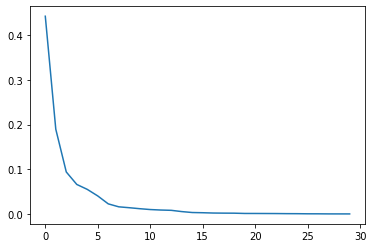

In [0]:
plt.plot(fit.explained_variance_ratio_)

Ce graph donne une idée génèrale sur les attributs principaux qu'on va utilisé ultérieurement : en effet ces attributs principaux sont les 2 premiers . on va continuer à vérifier

In [0]:
print (fit.explained_variance_ratio_)
print (fit.explained_variance_ratio_[:2].sum())

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
0.6324320765155942


On remarque que les 2 premiers attributs représente 63 % de la totalité de la variance et on va les garder 

In [0]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
x_pca = pca.transform(scaled_data)

In [0]:
scaled_data.shape

(569, 30)

Le format de notre Dataset est devenu 


In [0]:
x_pca.shape

(569, 2)

On a réduit le nombre des attributs de 30 à 2 . donc on peut visualizer les données facilement 

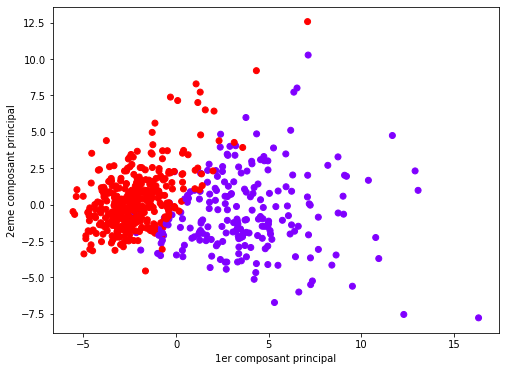

In [0]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='rainbow')
plt.xlabel('1er composant principal')
plt.ylabel('2eme composant principal')
plt.show()

Il est claire qu'avec des 2 composants on peut séparer les données en 2 entités entiérement distinctes  

on vizualise la matrice de corrélation entre les divers attributs 

In [0]:
#matrice de corrélations 
corr = df.corr()
print(corr)

                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -

le Hitmap suivant en mieux compréhensible et lisable que la matrice de corrélation en peut déterminer la corrélation entre les 2 attributs détecté avec le ACP les divers attributs comme le montre le hitmap suivant 

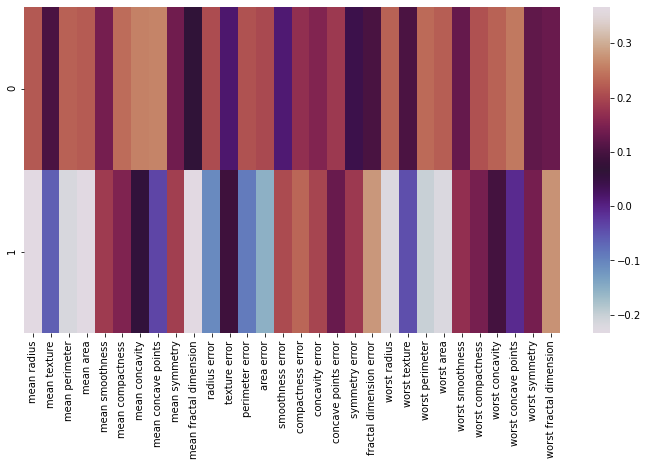

In [0]:
map= pd.DataFrame(pca.components_,columns=cancer['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

a travers ce hitmap on peut tirer plusieurs conclusions qui nous renseigne sur la nature de correlations entre les attributs qui décrivent les tumeurs cancéreuses par exemple : 
le 1er attribut "mean radius" est fortement corrolé positivement avec les attributs "mean symmetry" ,  "mean smoothness" d'ou on peut conclure que le rayon de la tumeure est proportionnelle avec la symetrie et l'autre attribut d'ou l'agumentation de l'un de ces attributs engendre l'augmentation des autres automatiquement d'ou l'augmentation de la chance que cet individu a le cancer  
